# TP1

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Ejercicio 1

In [2]:
MOD = 2**32.0
MULT = 1013904223
INC = 1664525

In [3]:
def gcl( seed, size=10, normalized=False ):
    results = []
    xn = seed
    for i in range(size):
        xn = (((MULT*xn) + INC) % MOD)
        results.append(xn)

    return results if not normalized else [ res/MOD for res in results ]

In [4]:
# (97980 + 98178 + 98070 + 100856) / 4 = 98771
numbers = gcl( 98771 )
for i,n in enumerate(numbers, 1):
    print("i={}: {}".format(i, n))

i=1: 2878200922.0
i=2: 412326400.0
i=3: 1712163840.0
i=4: 3808713216.0
i=5: 203738112.0
i=6: 392501760.0
i=7: 3528199168.0
i=8: 1639307776.0
i=9: 2357414912.0
i=10: 1844877824.0


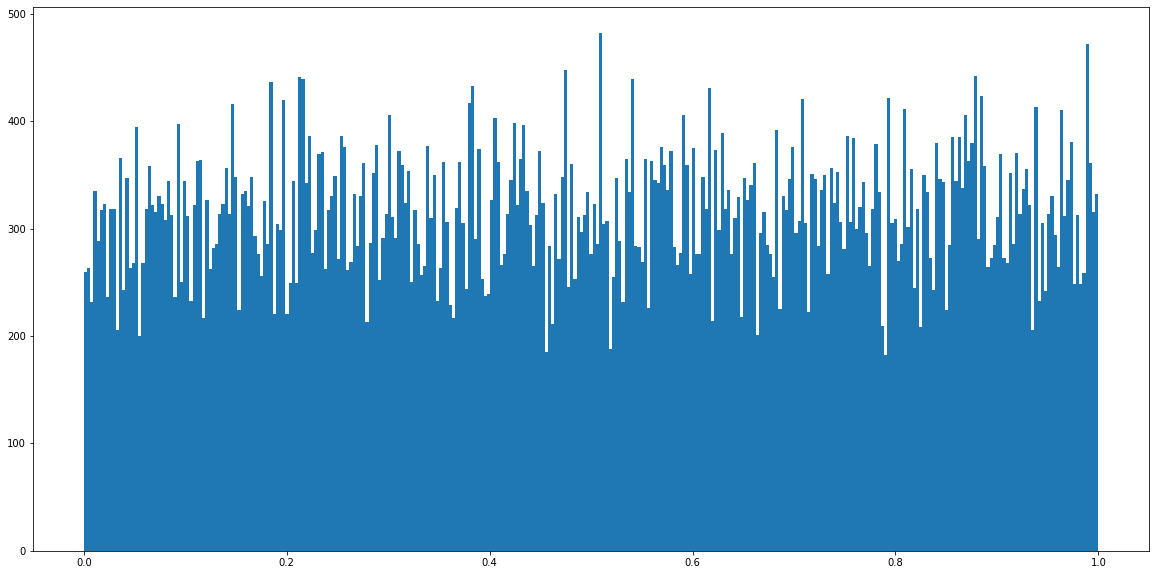

In [5]:
numbers = gcl( 98771, size=100000, normalized=True)
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(numbers, bins=317)
plt.show()

## Ejercicio 2

In [6]:
from scipy.stats import expon

a. Uso la distribución exponencial de scipy para graficar la densidad de probabilidad.

In [7]:
f = []

In [8]:
for t in range(10):
    f.append(1.0/25.0)

In [9]:
for t in range(10,100):
    f.append(3.0/5.0*expon.pdf(t,loc=10,scale=15))

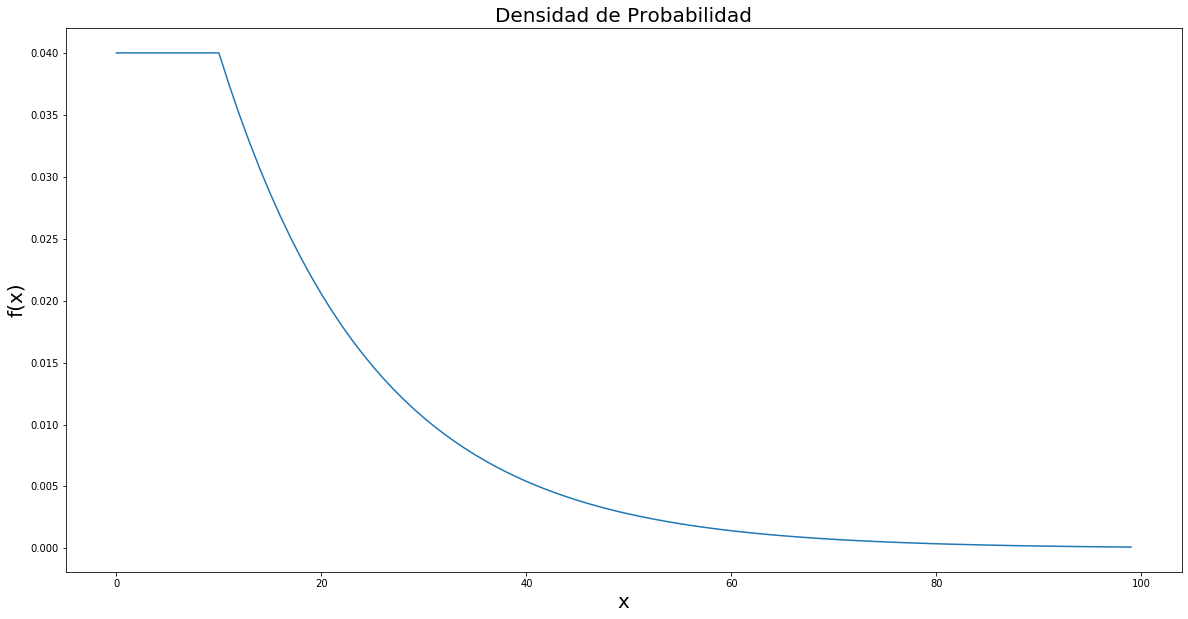

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(f)
ax.set_title("Densidad de Probabilidad",fontsize=20)
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("f(x)",fontsize=20)
plt.show()

b. Para graficar la distribución de probabilidad, uso la función cdf provista por scipy.

In [11]:
F = []

In [12]:
for t in range(10):
    F.append(1.0/25.0*t)

In [13]:
last = F[-1]

In [14]:
for t in range(11,100):
    F.append(3.0/5.0*expon.cdf(t,loc=10,scale=15) + last)

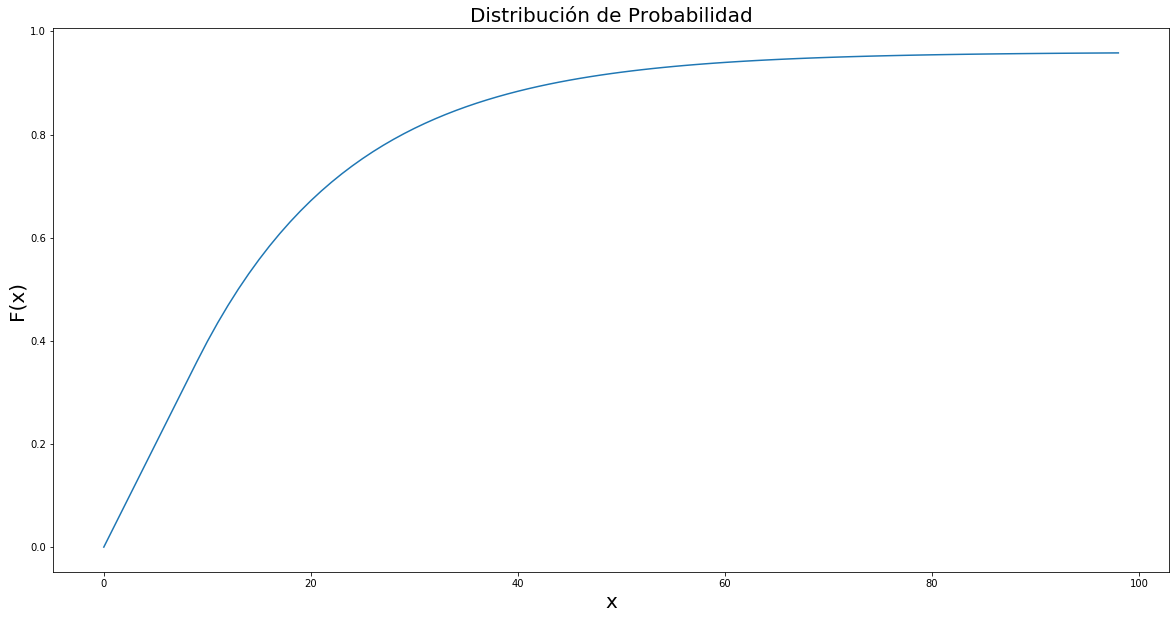

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(F)
ax.set_title("Distribución de Probabilidad",fontsize=20)
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("F(x)",fontsize=20)
plt.show()

Inversa - el máximo teórico para la primer parte de la distribución es 0.4, por lo que a partir de este punto se diferencia el input.

In [16]:
def inverse(u):
    if u <= 0.4:
        return u*25
    else:
        return 5/3*expon.ppf(u,scale=15)

In [17]:
i = []

In [18]:
for u in range(0,100):
    i.append(inverse(u/100))

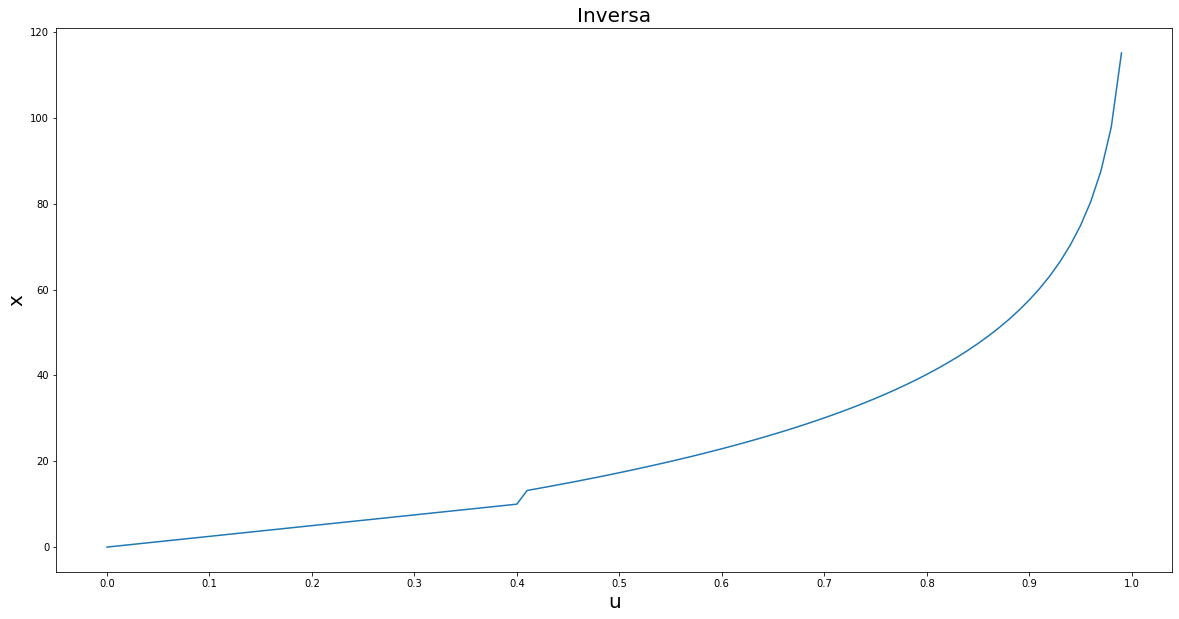

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(i)
ax.set_title("Inversa",fontsize=20)
ax.set_xlabel("u",fontsize=20)
ax.set_ylabel("x",fontsize=20)
ax.set_xticklabels([x/100 for x in range(0,101,10)])
ax.set_xticks(range(0,101,10))
plt.show()

c y d, grafico la inversa usando el generador del ejercicio 1.

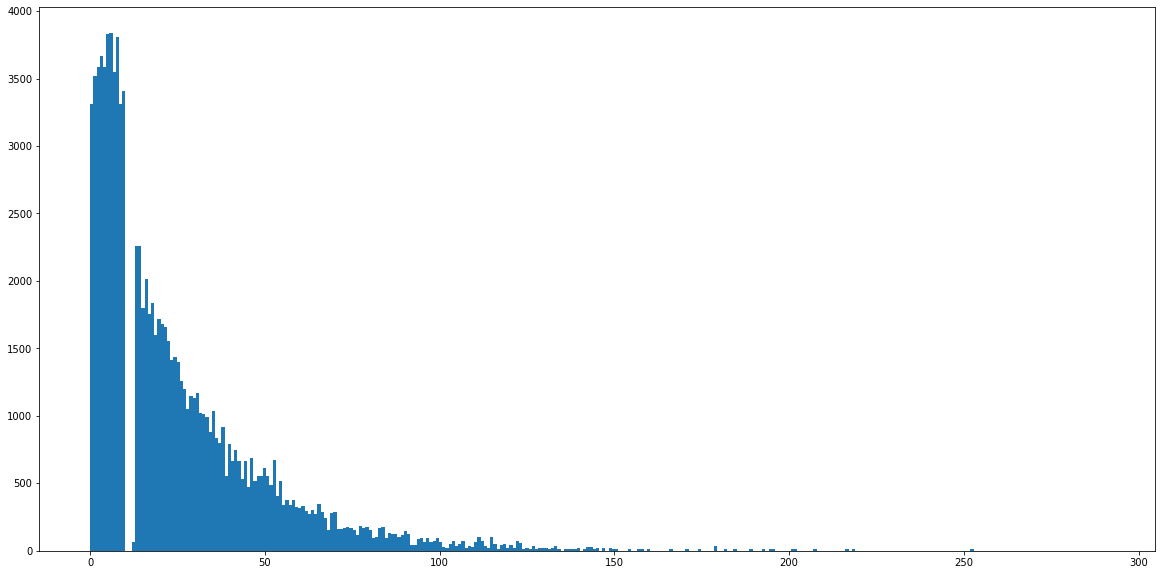

In [20]:
numbers = [inverse(u) for u in gcl( 98771, size=100000, normalized=True)]
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(numbers, bins=317)
plt.show()

## Ejercicio 3

In [21]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [22]:
x = np.arange(0,40)
k = max( p(x) / q(x) )

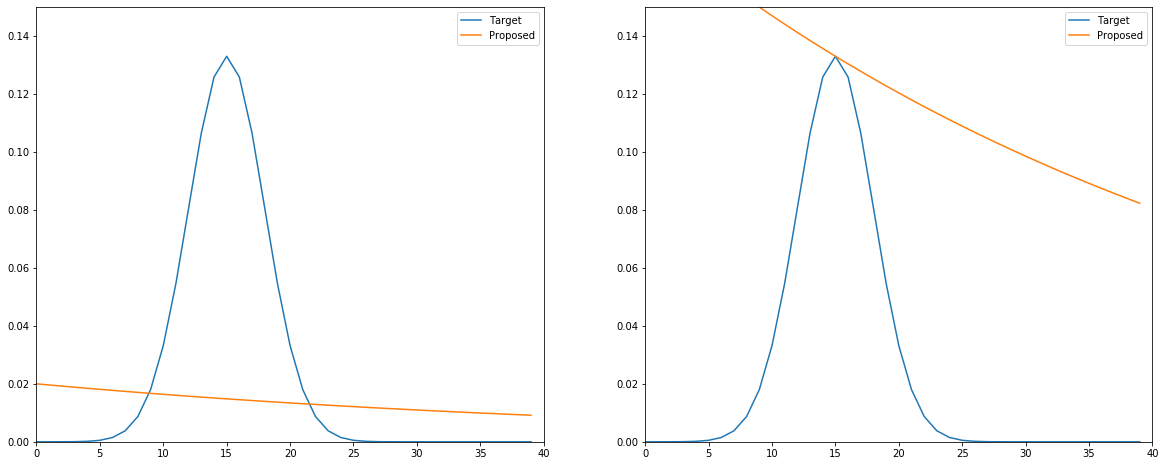

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(x, p(x), label='Target')
ax1.plot(x, q(x), label='Proposed')
ax1.set_ylim((0,0.150)); ax1.set_xlim((0,40))
ax2.plot(x, p(x), label='Target')
ax2.plot(x, k*q(x), label='Proposed')
ax2.set_ylim((0,0.150)); ax2.set_xlim((0,40))
ax1.legend(); ax2.legend()

In [24]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)


In [25]:
s = accept_reject_method()

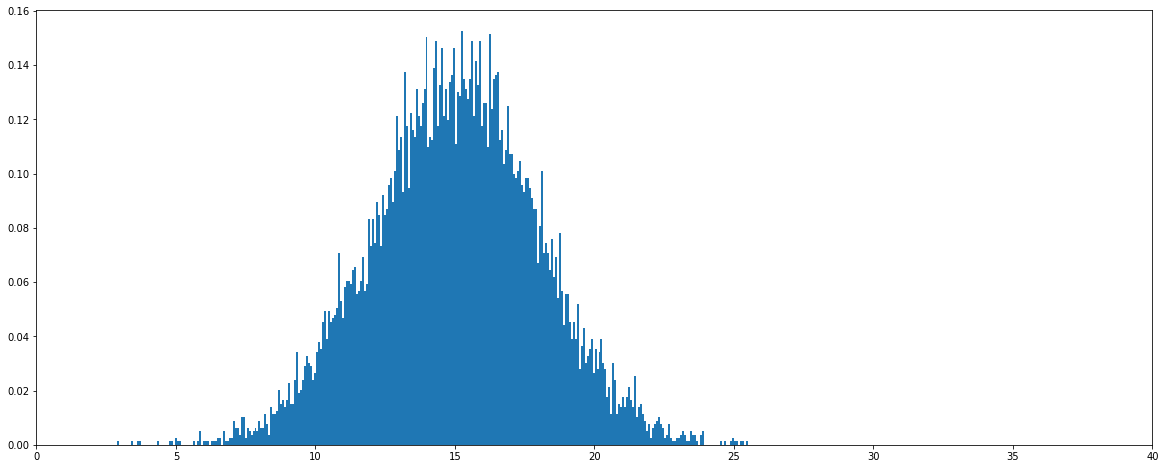

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.set_xlim((0,40))
plt.show()

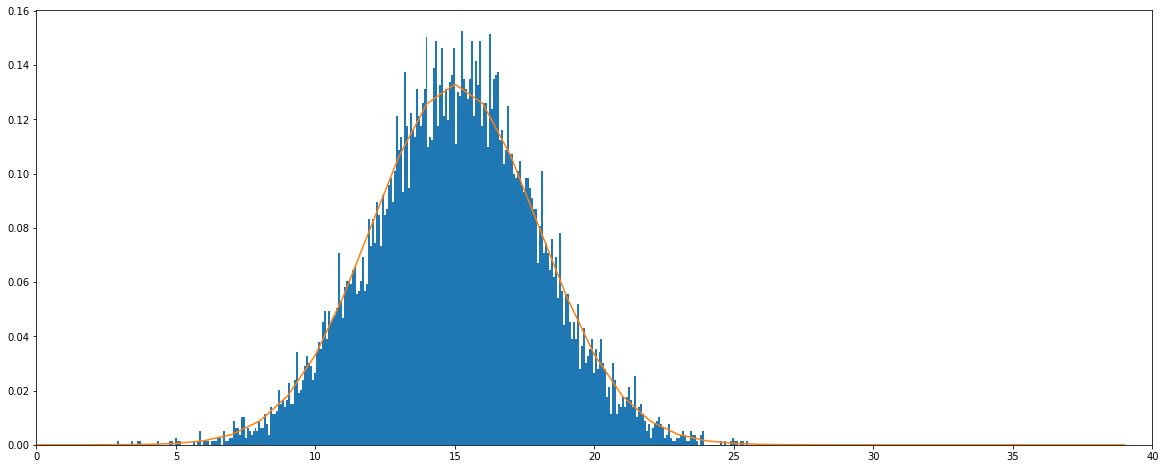

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.plot( x, p(x))
ax.set_xlim((0,40))
plt.show()

In [28]:
print("La media de la distribucion obtenida es: {} y la varianza: {}".format(s.mean(), s.var()))

La media de la distribucion obtenida es: 15.017215244145945 y la varianza: 8.788627773644455


In [29]:
print("Factor de rendimiento del metodo: {}".format( len(s)/100000))

Factor de rendimiento del metodo: 0.11118


## Ejercicio 4

In [30]:
from scipy.ndimage.interpolation import rotate
import math

In [31]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [32]:
points = 1000

In [33]:
xs = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5
ys = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5

In [34]:
l = []
for i in range(points):
    l.append(rotate((10,10),(xs[i],ys[i]),math.radians(45)))

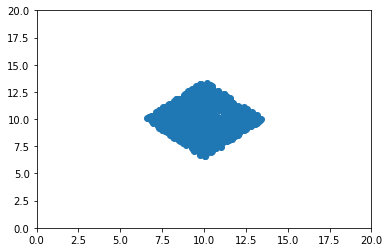

In [35]:
fig,ax = plt.subplots()
ax.scatter([x[0] for x in l],[x[1] for x in l])
ax.set_xlim((0,20))
ax.set_ylim((0,20))
plt.show()

## Ejercicio 5

In [36]:
from scipy.stats import norm

In [37]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

In [38]:
us = np.random.uniform(0,1,(100000,2))

In [39]:
z1 = []
z2 = []
for u1, u2 in us:
    zs = box_muller(u1,u2)
    z1.append(zs[0])    
    z2.append(zs[1])

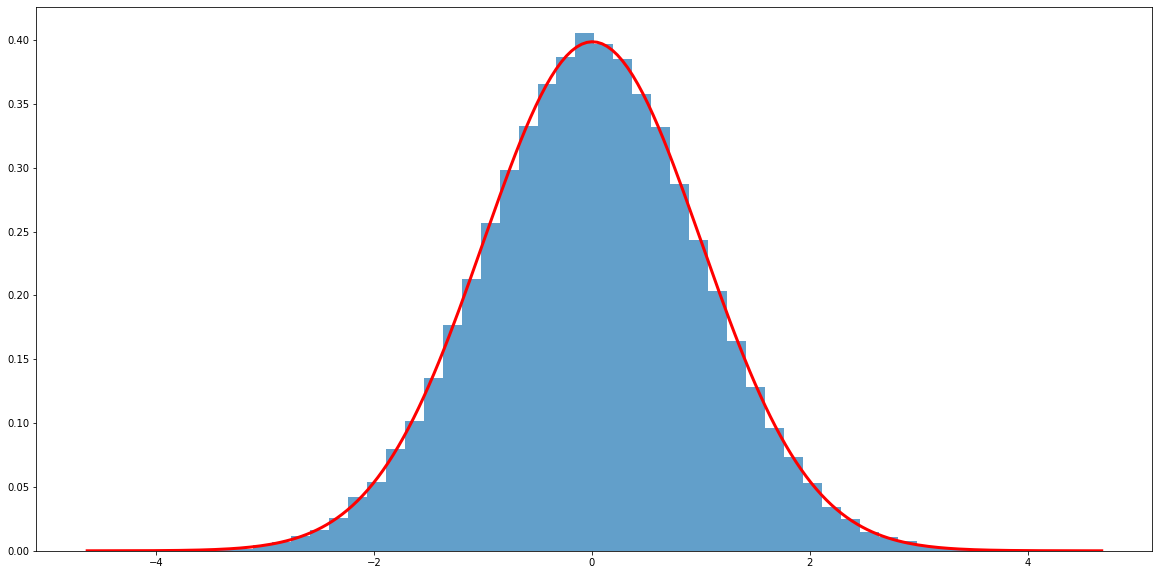

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z1,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

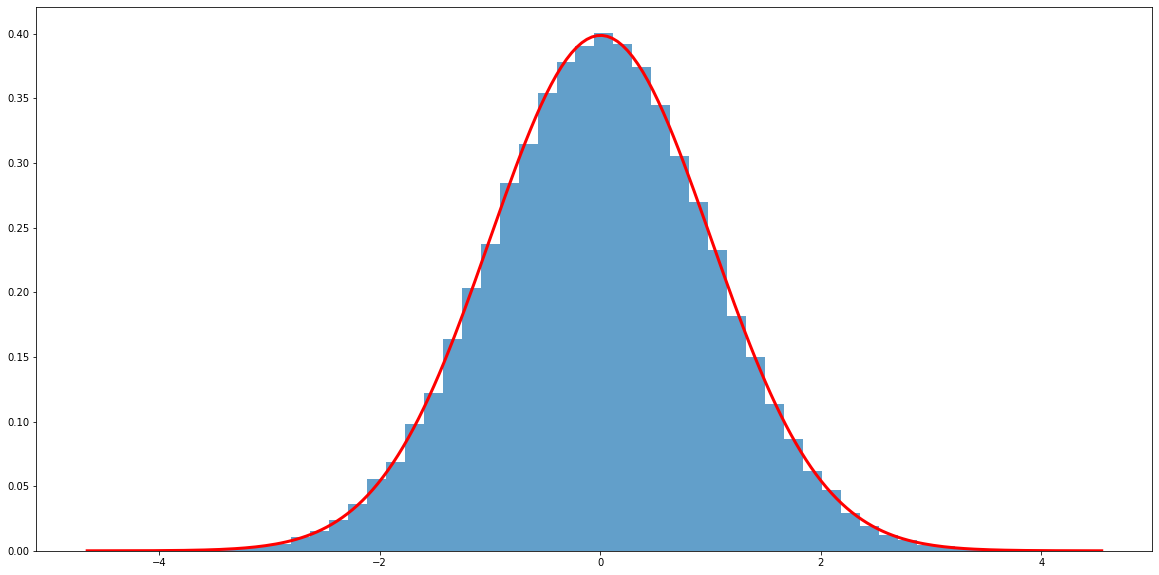

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z2,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

In [42]:
print("media de z1: %.2f, varianza de z1: %.2f" % (np.mean(z1),np.var(z1)))

media de z1: 0.00, varianza de z1: 1.00


In [43]:
print("media de z2: %2f, varianza de z2: %2f" % (np.mean(z1),np.var(z1)))

media de z2: 0.004219, varianza de z2: 1.001336


## Ejercicio 6

In [44]:
values=gcl(98771,size=100000,normalized=True)

In [45]:
#DEFINO LA F^-1 de la consigna

def FdistInversa(categoria):
    categoria=[0,0,0,0]
    for number in values:
        if number<0.1:
            categoria[0]+=1.0
        elif number>=0.1 and number<0.6:
            categoria[1]+=1.0
        elif number>=0.6 and number<0.9:
            categoria[2]+=1.0
        elif number>=0.9:
            categoria[3]+=1.0
    return categoria

categoria=FdistInversa(values)

print(categoria)

[9512.0, 50100.0, 30309.0, 10079.0]


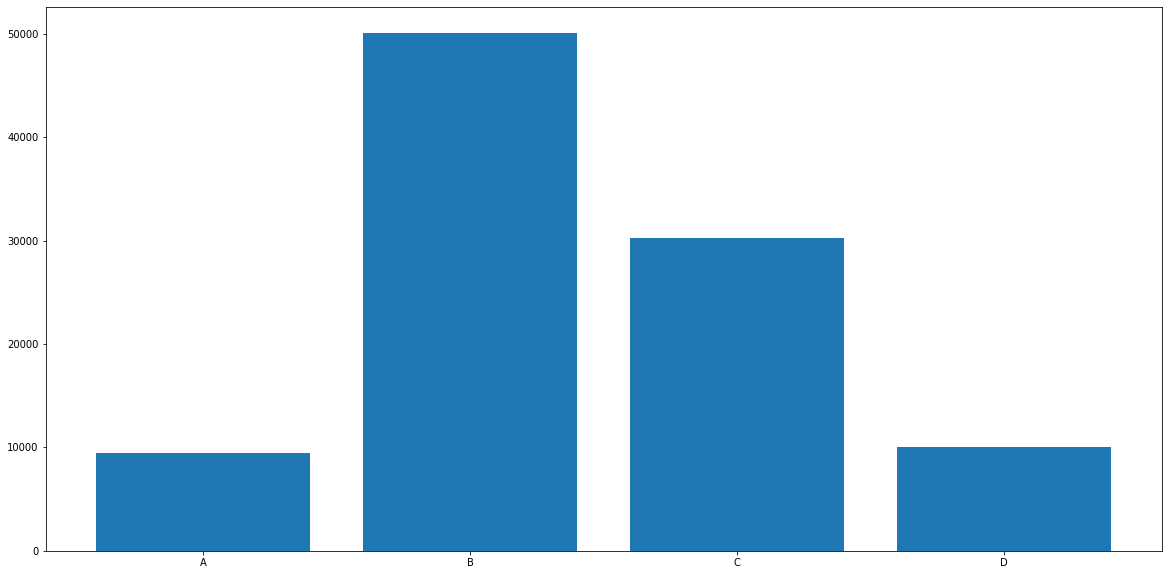

In [46]:
import matplotlib.pyplot as plt

data = {'A': categoria[0], 'B': categoria[1], 'C': categoria[2], 'D': categoria[3]}
names = list(data.keys())
values = list(data.values())


fig, ax = plt.subplots(figsize=(20,10))

plt.bar(names, values)
plt.show()

In [47]:
valores=100000
print('Categoria\tCantidad Total\t Cantidad Porcentual obtenida\t Cantidad porcentual esperada')
print('A: \t\t' + str(categoria[0]) + '\t\t' + str(categoria[0]/valores) + '%\t\t\t' + '0.1%')
print('D: \t\t' + str(categoria[1]) + '\t\t' + str(categoria[1]/valores) + '%\t\t\t\t' + '0.5%')
print('C: \t\t' + str(categoria[2]) + '\t\t' + str(categoria[2]/valores) + '%\t\t\t' + '0.3%')
print('D: \t\t' + str(categoria[3]) + '\t\t' + str(categoria[3]/valores) + '%\t\t\t' + '0.1%')

Categoria	Cantidad Total	 Cantidad Porcentual obtenida	 Cantidad porcentual esperada
A: 		9512.0		0.09512%			0.1%
D: 		50100.0		0.501%				0.5%
C: 		30309.0		0.30309%			0.3%
D: 		10079.0		0.10079%			0.1%


## Ejercicio 7

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
def spectral_test_2d( lcg, seed=98771 ):
    '''
    Given a linear congruent generator lcg,
    obtain a 2D scatter plot where: for each
    point (x, y),
      - x = lcg(i)
      - y = lgc(i+1)
    '''
    
    # generate samples
    samples = 10000
    
    x = lcg( seed,   size=samples, normalized=True )
    y = lcg( seed+1, size=samples, normalized=True )
    
    # plot results
    fig, axes = plt.subplots( 3, 2, figsize=( 20, 20 ) )
    ax = axes.flatten()
    
    ax[0].set_title( 'Test espectral 2D del GCL' )
    ax[0].set_xlabel( 'GCL(x)' )
    ax[0].set_ylabel( 'GCL(x+1)' )
    ax[0].scatter( x=x, y=y, s=2 )
    
    ax[2].set_title( 'Zoom en el eje X' )
    ax[2].set_xlabel( 'GCL(x)' )
    ax[2].set_ylabel( 'GCL(x+1)' )
    ax[2].set_xlim(xmin=0.3,xmax=.7)
    ax[2].scatter( x=x, y=y, s=2 )
    
    ax[3].set_title( 'Zoom en el eje X' )
    ax[3].set_xlabel( 'GCL(x)' )
    ax[3].set_ylabel( 'GCL(x+1)' )
    ax[3].set_xlim(xmin=0.3,xmax=.5)
    ax[3].scatter( x=x, y=y, s=2 )
    
    ax[4].set_title( 'Zoom en el eje Y' )
    ax[4].set_xlabel( 'GCL(x)' )
    ax[4].set_ylabel( 'GCL(x+1)' )
    ax[4].set_ylim(ymin=0.3,ymax=.7)
    ax[4].scatter( x=x, y=y, s=2 )
    
    ax[5].set_title( 'Zoom en el eje Y' )
    ax[5].set_xlabel( 'GCL(x)' )
    ax[5].set_ylabel( 'GCL(x+1)' )
    ax[5].set_ylim(ymin=0.3,ymax=.5)
    ax[5].scatter( x=x, y=y, s=2 )
    
    plt.show()

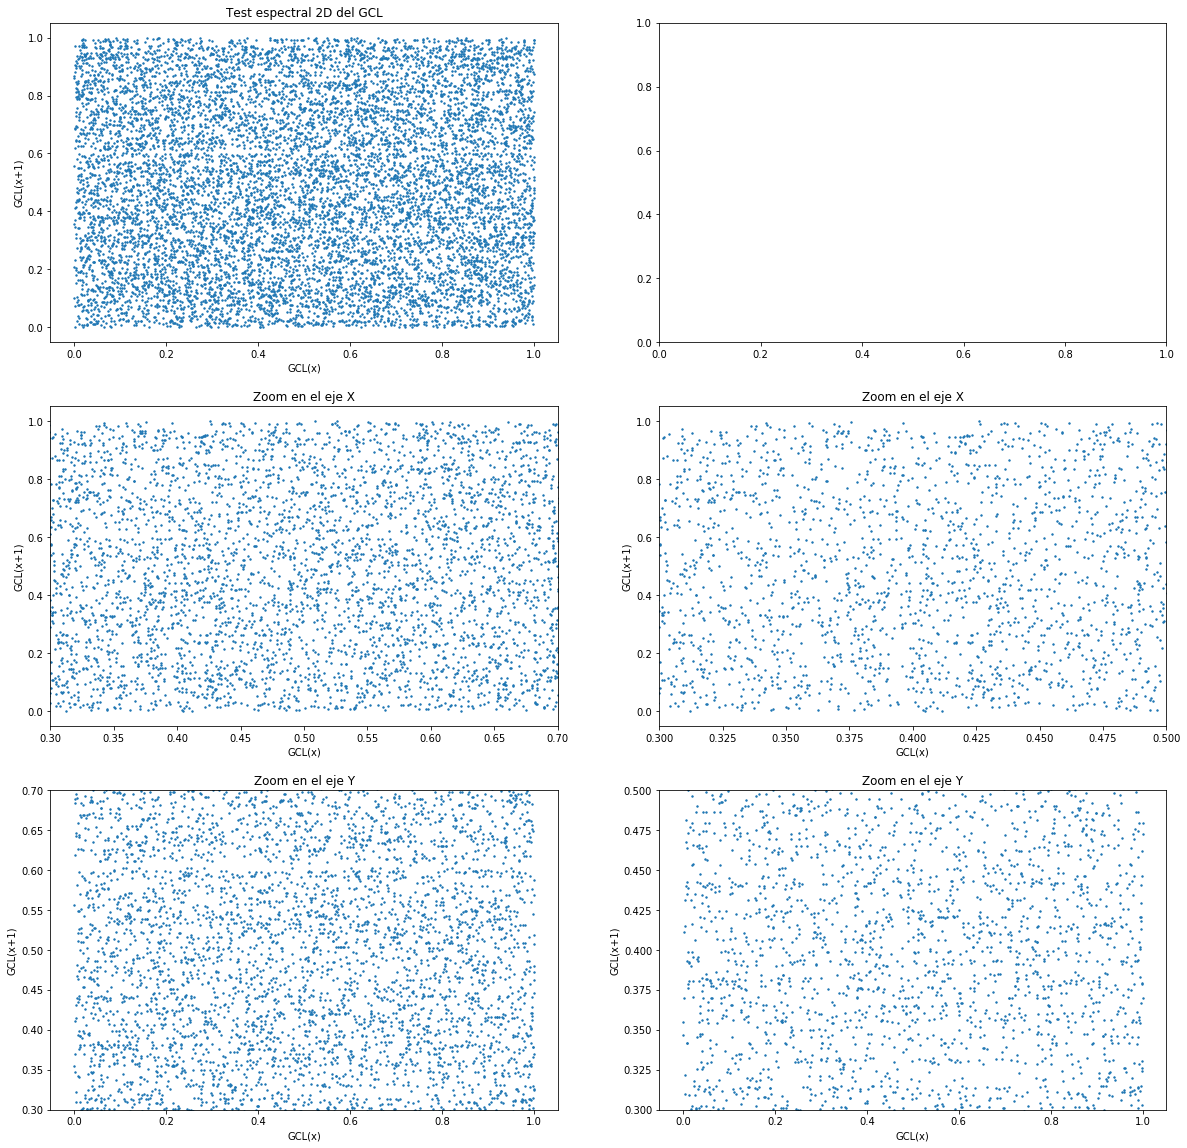

In [50]:
spectral_test_2d( gcl )

In [51]:
from mpl_toolkits import mplot3d

def spectral_test_3d( lcg, seed=98771 ):
    '''
    Given a linear congruent generator lcg,
    obtain a 3D scatter plot where: for each
    point (x, y, z),
      - x = lcg(i)
      - y = lgc(i+1)
      - z = lcg(i+2)
    '''
    
    fig = plt.figure( figsize=( 20, 20 ) )

    # generate samples
    samples = 10000
    x = lcg( seed,   size=samples, normalized=True )
    y = lcg( seed+1, size=samples, normalized=True )
    z = lcg( seed+2, size=samples, normalized=True )
    
    # plot results at 30, 40 and 60 degrees
    fignum = 1
    for angle in [30, 60]:
        for elev in [30, 60]:
            ax = fig.add_subplot( 2, 2, fignum, projection='3d' )
            ax.set_title( 'Rotacion: {} y {} grados'.format( angle, elev ) )
            ax.scatter( x, y, z )
            ax.set_xlabel( 'GCL(x)' )
            ax.set_ylabel( 'GCL(x+1)' )
            ax.set_zlabel( 'GCL(x+2)' )
            ax.view_init( elev=elev, azim=angle )
            fignum += 1

    plt.show()

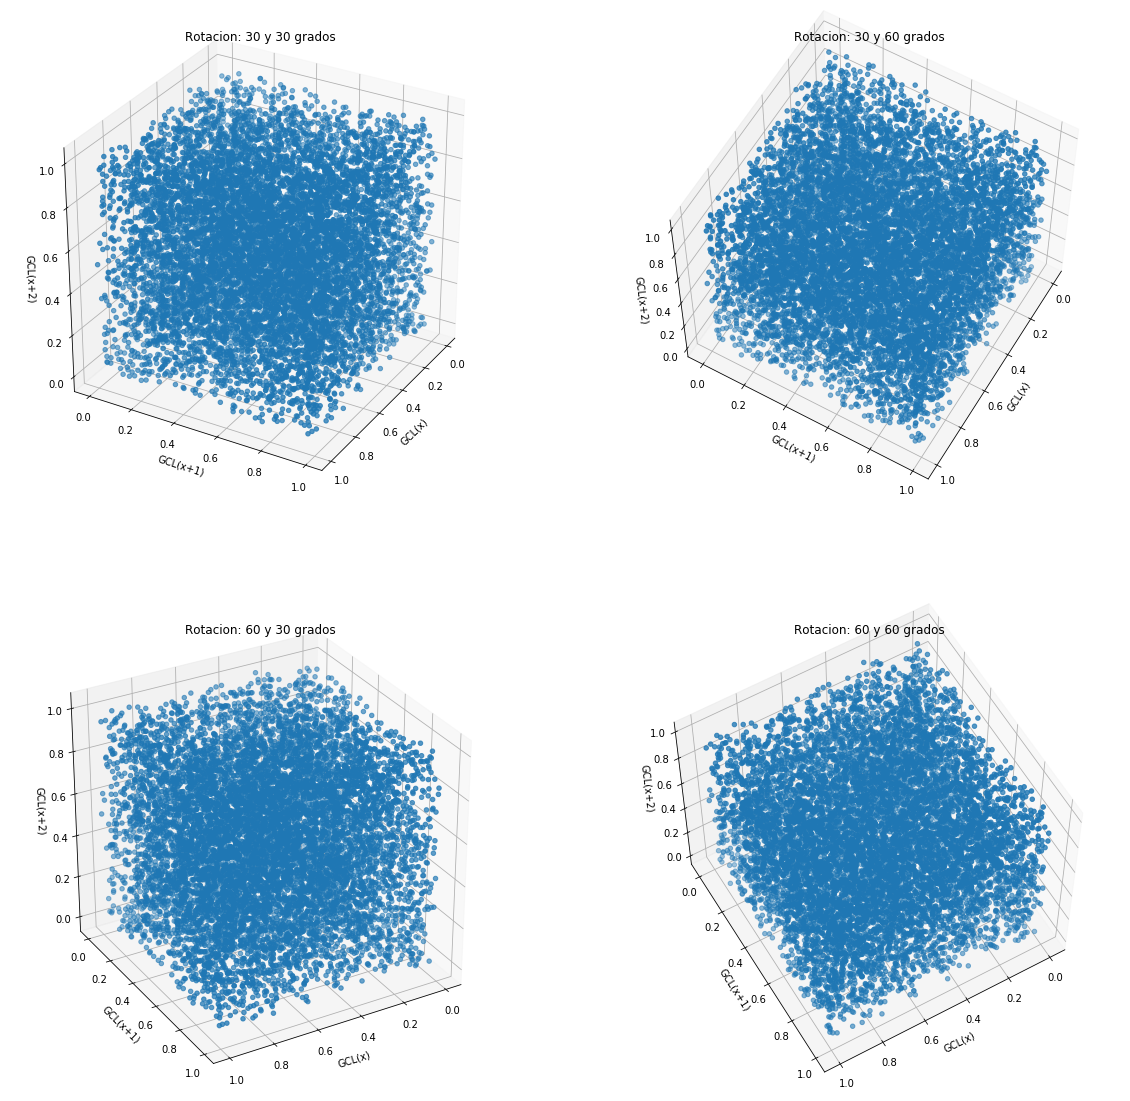

In [52]:
spectral_test_3d( gcl )

## Ejercicio 8

Para este ejercicio se realiza una secuencia de números aleatorios con el GCL.

Luego se recorre la secuencia, midiendo el tamaño de los saltos (gaps) dependendiendo de que el número actual de la secuencia esté entre alpha y beta o no.
Este es la distribución observada, que debería asemejarse a una geométrica.

Luego se genera la distribución geometrica esperada. Para esto se realiza el producto de la probabilidad de un determinado tamaño de salto por la cantidad de saltos realizados en el experimento, que se obtiene en el paso anterior, contando el total de saltos encontrados.

Por último se compara las distribuiones con el test de chi cuadrado. Con el p-valor obtenido, se compara con el nivel de significación al que se somete el test y se determina si se acepta o rechaza la hipótesis nula de que la distribucipon observada es una geométrica.

In [53]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [54]:
def gap_test( lcg, alpha, beta, ns, seed=98771 ):
    '''
    1. Generate random numbers in [0,1] with the given lcg
    2. Obtain frecuencies of every observed gap
    3. Compare the observed distribution with a Geometric distribution
    4. Return True if lcg passes the gap test, False otherwise
    '''
    
    samples = 100000
    
    samples = lcg( seed, size=samples, normalized=True )
    gaps = {}
    gap_size = 0
    for u in samples:
        if u < alpha or beta < u:
            gap_size += 1
        else:
            if gap_size not in gaps:
                gaps[gap_size] = 0
            gaps[gap_size] += 1
            gap_size = 0
    
    # fill not seen gaps with 0
    gs = [ i for i in range( max( gaps ) ) ]
    for i in gs:
        if i not in gaps: 
            gaps[i] = 0
    
    # observed distribution
    observed = [gaps[g] for g in gs]
    
    # probability of success of the geometric distribution
    p_ab = beta - alpha
    # probability of sequence of length x of the geometric distribution
    p = lambda x : p_ab * ( 1 - p_ab ) ** x
    
    # ammount of gaps observed/generated
    gap_samples = sum( [ gaps[i] for i in gaps ] )
    
    expected = [ 1 + ( gap_samples * p( g ) ) for g in gs ]
    
    # show histograms
    fig = plt.figure( figsize=( 20, 10 ) )
    x1 = [ i for i in range( len( observed ) ) for j in range( observed[i] ) ] 
    x2 = [ i for i in range( len( expected ) ) for j in range( int( expected[i] ) ) ]
    plt.hist( [x1,x2], bins=10, label=['Observed','Expected'], color=['red','blue'] )
    plt.xlabel( 'Gap sizes' )
    plt.ylabel( 'Number of occurrences' )
    plt.legend()
    plt.show()
    
    # compare distributions
    statistic, p_val = scipy.stats.chisquare( observed, f_exp=expected )
    
    if p_val < ns:
        return False
    return True

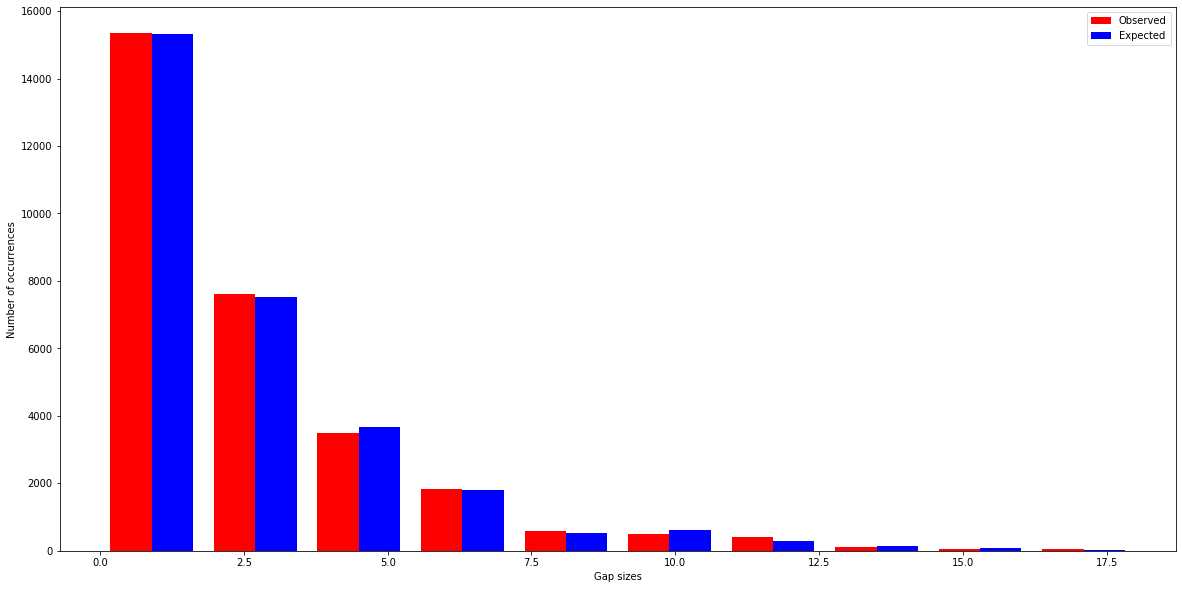

El gcl no pasa el gap test


In [55]:
alpha = 0.3
beta = 0.6

# significance level
ns = 0.01

if gap_test( gcl, alpha, beta, ns ):
    print( 'El gcl pasa el gap test' )
else:
    print( 'El gcl no pasa el gap test' )

## Ejercicio 9

In [56]:
print('Los resultados de la distrubucion empirica con la funcion de distribucion del ejercicio 6 son:')

print('A: ' + str(categoria[0]))
print('D: ' + str(categoria[1]))
print('C: ' + str(categoria[2]))
print('D: ' + str(categoria[3]))

Los resultados de la distrubucion empirica con la funcion de distribucion del ejercicio 6 son:
A: 9512.0
D: 50100.0
C: 30309.0
D: 10079.0


In [67]:
from scipy import stats as stats
import matplotlib.mlab as mlab

frecs = categoria
expected_values =  [0.1*100000,0.5*100000,0.3*100000,0.1*100000]


(s,p) = stats.chisquare(frecs,f_exp = expected_values)

print('Propongo como H0: La distribucion empirica se corresponde con la teorica')

print("s = " + str(s))
print("p = " + str(p))



if(p < 0.01):
    
    print("Acepto H0 con un pvalue de " + str(p))
else:
    
    print("Rechazo H0 con un pvalue de " + str(p))
    (s,p) = stats.chisquare(frecs,f_exp = expected_values,)
    
    if(p < 0.05):
        print("Acepto H0 con un pvalue de " + str(p))
    else:
        print("Rechazo H0 con un pvalue de " + str(p))

Propongo como H0: La distribucion empirica se corresponde con la teorica
s = 27.821199999999997
p = 3.959819579385525e-06
Acepto H0 con un pvalue de 3.959819579385525e-06


## Ejercicio 10

In [85]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [69]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)

In [70]:
from random import random
import math
import numpy as np

def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)

In [86]:
(s,p) = stats.kstest(accept_reject_method(100000), stats.norm.cdf)


print('Propongo como H0: Los numeros del generador se distribuyen como una normal')


print("s = " + str(s))
print("p = " + str(p))

if(p < 0.01):
    
    print("Acepto H0 con un pvalue de " + str(p))
else:
    
    print("Rechazo H0 con un pvalue de " + str(p))
    (s,p) = stats.kstest(accept_reject_method(100000), stats.norm.cdf)
    
    if(p < 0.05):
        print("Acepto H0 con un pvalue de " + str(p))
    else:
        print("Rechazo H0 con un pvalue de " + str(p))

Propongo como H0: Los numeros del generador se distribuyen como una normal
s = 0.9999868544199141
p = 0.0
Acepto H0 con un pvalue de 0.0
